#Customer Analytics - Capstone Project



#Piyush Patil – 989468326


#Enhancing Customer Retention in Telecom through churn Prediction and Segmentation


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from lightgbm import LGBMClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
!pip install scikit-learn
from sklearn.linear_model import LogisticRegression

In [64]:
df = pd.read_csv("/content/cell2celltrain.csv")
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


Here is a brief description of some of the key columns from your telecom churn dataset:

o Churn: Indicates if the customer has churned (left) or is retained.

o Monthly Revenue: The revenue generated by each customer monthly.

o Monthly Minutes: Total minutes of usage per month by the customer.

o Total Recurring Charge: The total recurring charge for each customer.

o Director Assisted Calls: The count of calls that required assistance.

o Average Minutes: Minutes exceeding the allocated plan limit.

o Roaming Calls: Number of calls made while roaming.

o PercChange Minutes: Percentage change in the minutes of usage
compared to a previous period.

o PercChange Revenues: Percentage change in revenue for each
customer.

o Dropped Calls: Number of calls dropped during the period.

o Blocked Calls: Calls attempted but blocked due to network or other
issues.

o Customer Care Calls: Number of calls to customer care.

o Three-way Calls: Calls involving three participants.

o Months In Service: Number of months the customer has been in
service.

o Service Area: Geographical service area of the customer.

o Handsets: Number of handsets associated with the account.

o Income Group: Income group classification of the custome

In [18]:
df = df.drop('CustomerID', axis=1)

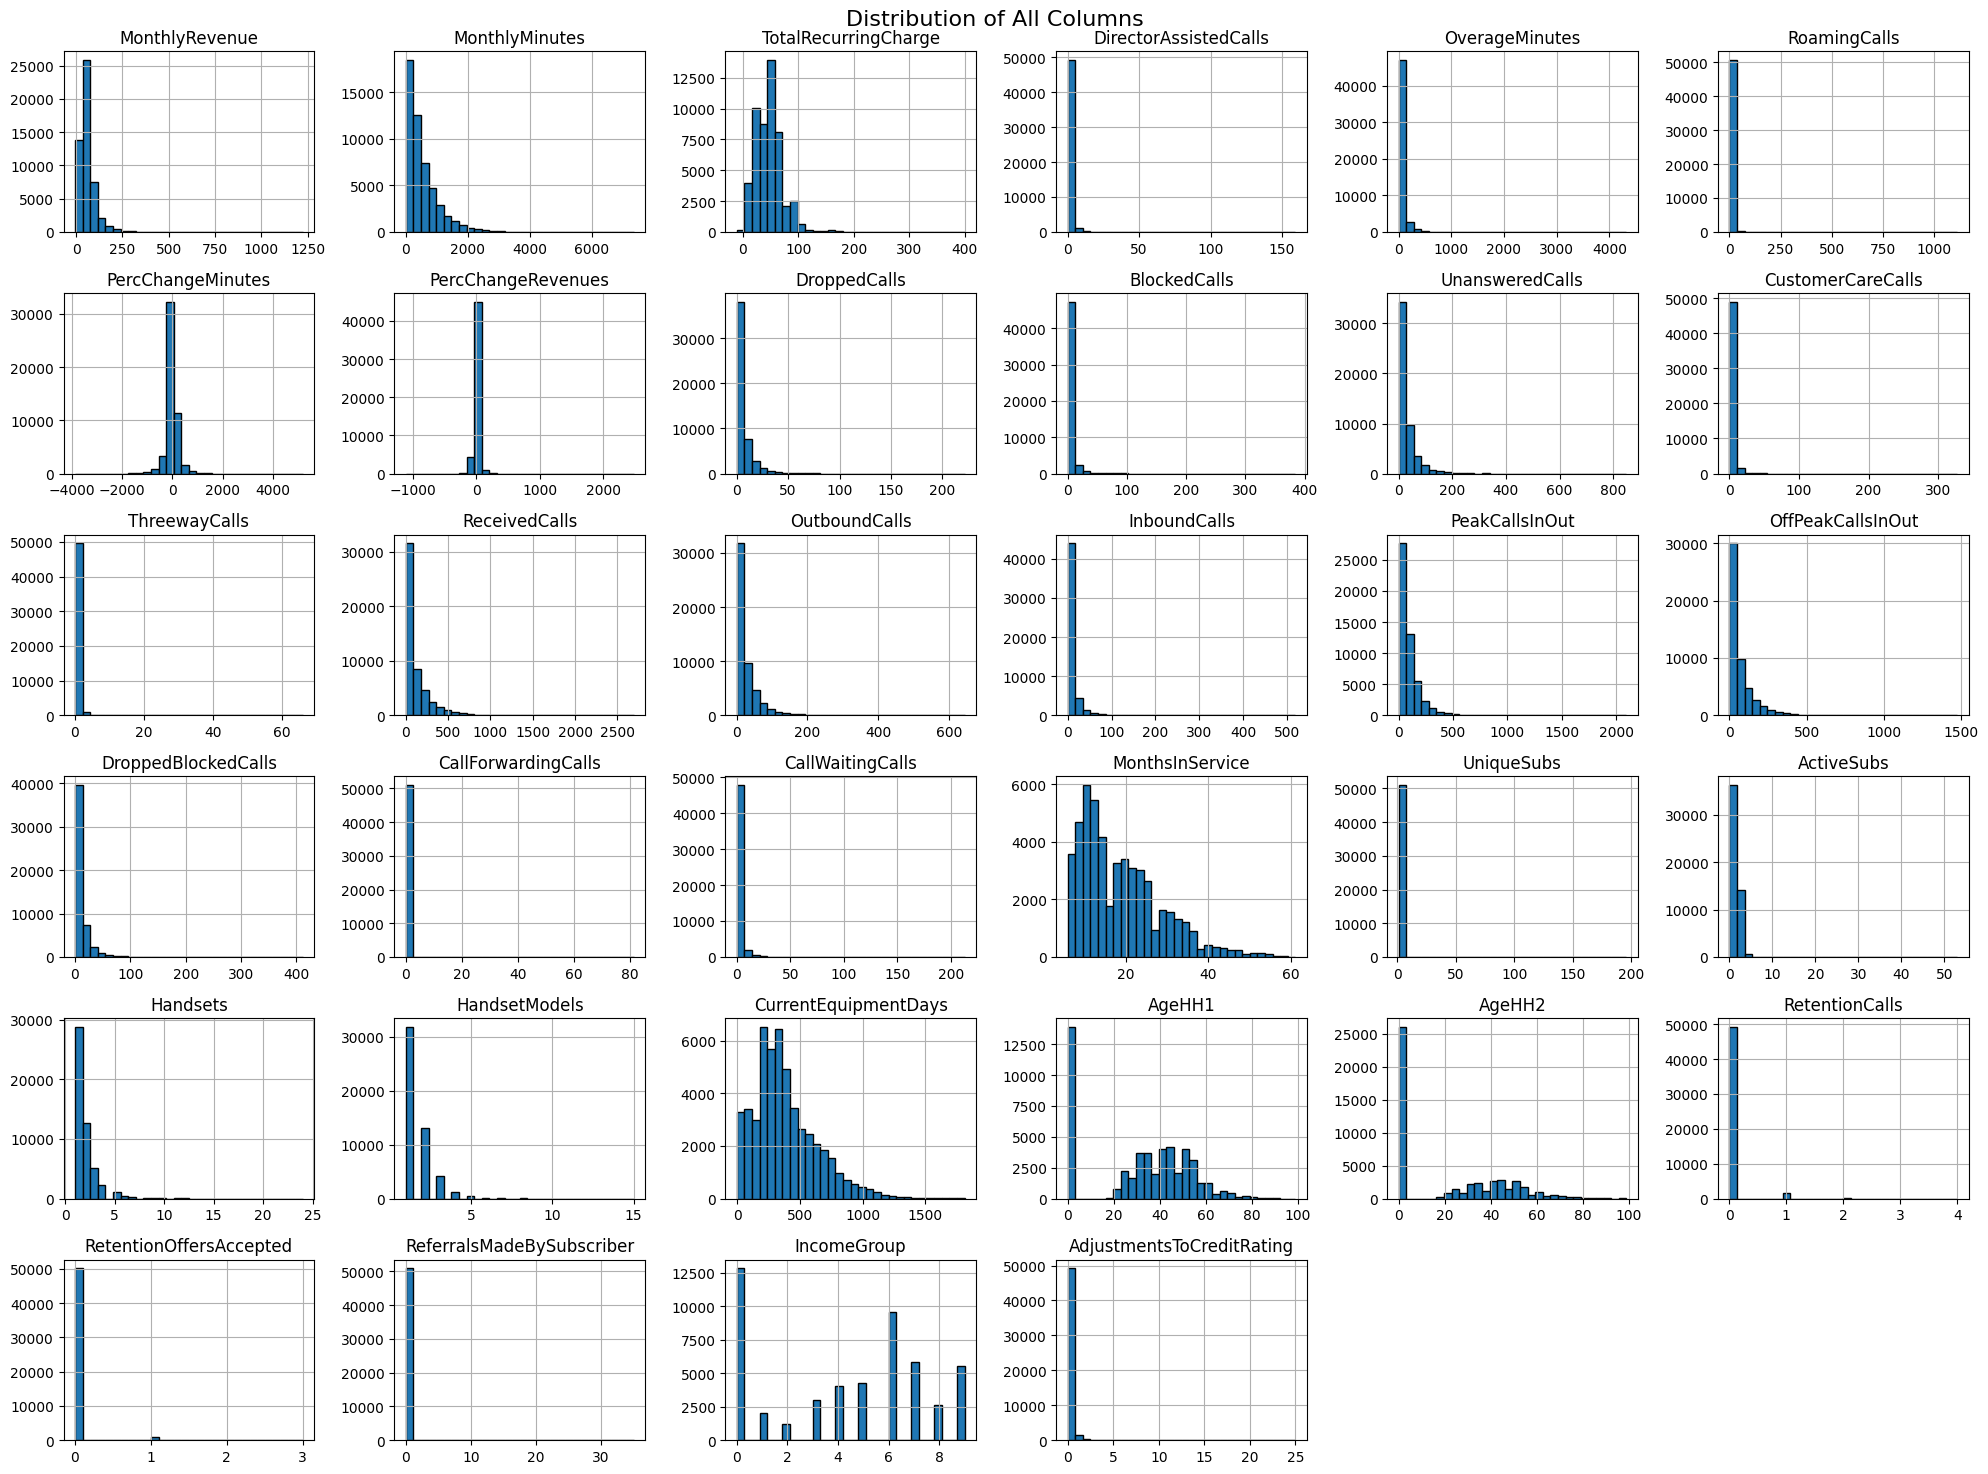

In [19]:
df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Distribution of All Columns", fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
df.shape

(51047, 57)

In [21]:
print(df.columns)

Index(['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMoto

In [22]:
print(df.dtypes)

Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
Handsets                     float64
H

In [23]:
df.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,4.085672,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,10.946905,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,0.000000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,3.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [27]:
df.drop('CustomerID', axis=1,inplace = True)

In [28]:
null_values = df.isnull().sum()
null_values[null_values > 0]

,0
MonthlyRevenue,156
MonthlyMinutes,156
TotalRecurringCharge,156
DirectorAssistedCalls,156
OverageMinutes,156
RoamingCalls,156
PercChangeMinutes,367
PercChangeRevenues,367
ServiceArea,24
Handsets,1


In [29]:
df.shape

(51047, 57)

In [30]:
df.Homeownership.value_counts()

,count
Homeownership,
Known,33987
Unknown,17060


In [31]:
for col in df.columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("-" * 50)

Value counts for column 'Churn':
Churn
No     36336
Yes    14711
Name: count, dtype: int64
--------------------------------------------------
Value counts for column 'MonthlyRevenue':
MonthlyRevenue
29.99     1069
34.99      806
10.00      469
30.00      404
49.99      392
          ... 
118.03       1
230.65       1
194.90       1
119.77       1
109.96       1
Name: count, Length: 12665, dtype: int64
--------------------------------------------------
Value counts for column 'MonthlyMinutes':
MonthlyMinutes
0.0       723
2.0       138
8.0       127
6.0       122
88.0      116
         ... 
2252.0      1
2391.0      1
3129.0      1
4578.0      1
2437.0      1
Name: count, Length: 2719, dtype: int64
--------------------------------------------------
Value counts for column 'TotalRecurringCharge':
TotalRecurringCharge
30.0     7302
45.0     6630
60.0     4435
40.0     4415
50.0     4143
         ... 
149.0       1
302.0       1
281.0       1
207.0       1
212.0       1
Name: count, Length

In [32]:
df.HandsetPrice.value_counts()

,count
HandsetPrice,
Unknown,28982
30,7328
150,4115
130,2105
80,1960
10,1928
60,1776
200,1266
100,1235


In [33]:
df.HandsetPrice.unique()

array(['30', 'Unknown', '10', '80', '150', '300', '40', '200', '100',
       '130', '60', '400', '240', '250', '180', '500'], dtype=object)

In [50]:
df['HandsetPrice'] = pd.to_numeric(df['HandsetPrice'], errors='coerce')
known = df.dropna(subset=['HandsetPrice'])
unknown = df[df['HandsetPrice'].isna()]
X_train = known.select_dtypes(include='number').drop('HandsetPrice', axis=1)
y_train = known['HandsetPrice']
X_test = unknown.select_dtypes(include='number').drop('HandsetPrice', axis=1)
if not X_test.empty:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    df.loc[df['HandsetPrice'].isna(), 'HandsetPrice'] = model.predict(X_test)
    print("Missing 'Unknown' values replaced successfully.")
else:
    print("No missing values to replace.")
print(df['HandsetPrice'].value_counts())

No missing values to replace.
HandsetPrice
30.0     7450
150.0    4127
130.0    2149
80.0     1978
10.0     1928
         ... 
182.8       1
204.2       1
158.8       1
176.9       1
26.2        1
Name: count, Length: 1453, dtype: int64


By using Random forest fills missing handset prices by replacing 'Unknown' values with NaN. It splits the data into two parts: one with known prices to train a Random Forest Regressor and another with unknown prices to predict. The model learns patterns from the known prices and related features, such as customer data and usage. It then predicts the missing values for the rows with unknown prices. These predictions replace the NaN entries, completing the dataset with estimated handset prices based on the identified patterns.

In [42]:
df.HandsetPrice.value_counts()

,count
HandsetPrice,
30.0,7450
150.0,4127
130.0,2149
80.0,1978
10.0,1928
...,...
182.8,1
204.2,1
158.8,1


In [43]:
df.HandsetPrice.unique()

array([ 30. ,  28.8,  10. , ..., 168.3, 160.9,  26.2])

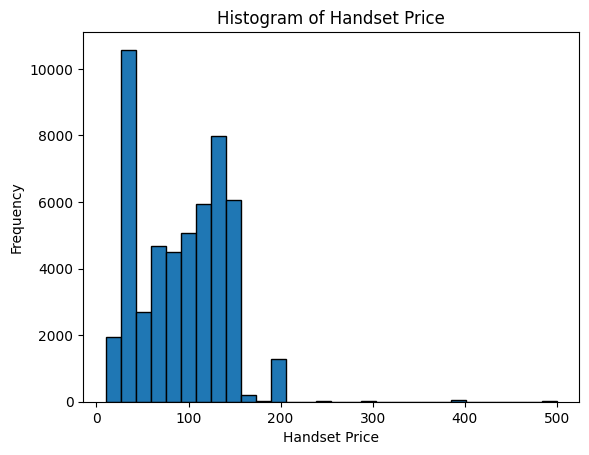

In [44]:
df['HandsetPrice'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Histogram of Handset Price')
plt.xlabel('Handset Price')
plt.show()

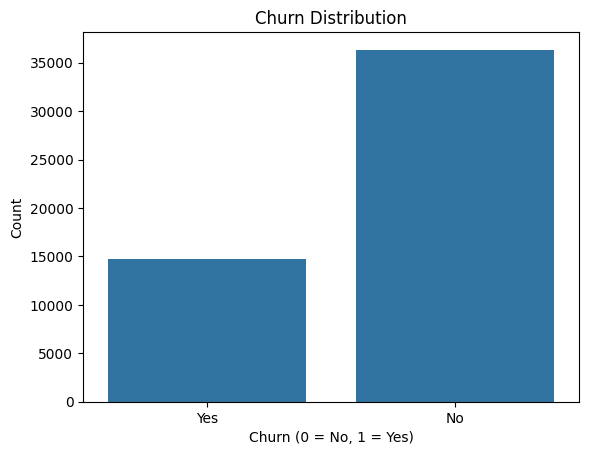

In [45]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

This bar chart represents the distribution of customer churn in the dataset. The two bars show the counts of
customers who have churned ("Yes") and those who have not churned ("No").
o The chart indicates that a significantly larger number of customers did not churn compared to those who did.
This imbalance in the data suggests that most customers stayed with the company, while a smaller portion left.
Recognizing this imbalance is important, as it may affect model performance and necessitate handling methods
like resampling to improve churn prediction.

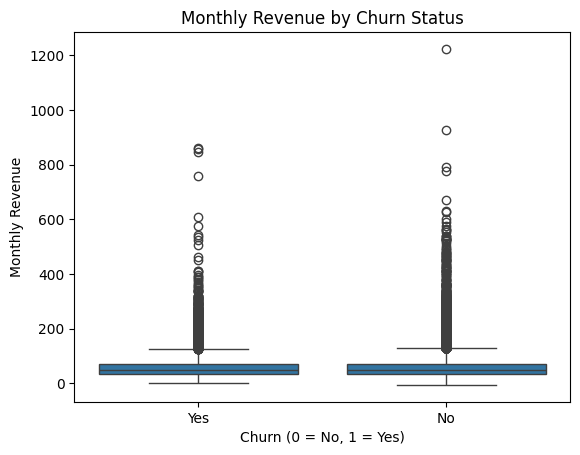

In [46]:
sns.boxplot(x='Churn', y='MonthlyRevenue', data=df)
plt.title('Monthly Revenue by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Revenue')
plt.show()

This boxplot displays the monthly revenue distribution for customers who churned ("Yes") and those who did not ("No").
Both groups have a similar revenue distribution with many outliers, indicating that high monthly revenue doesn't
necessarily correlate with churn.

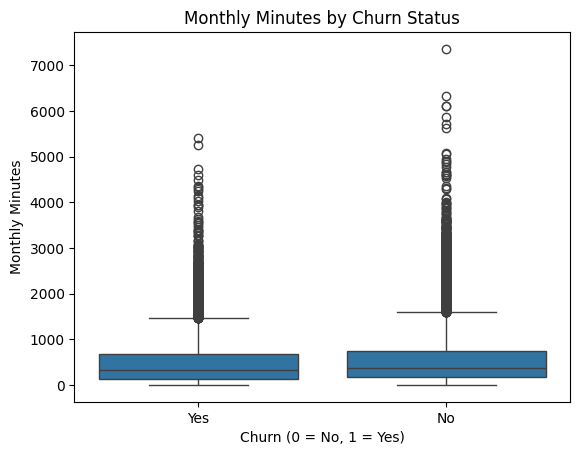

In [47]:
sns.boxplot(x='Churn', y='MonthlyMinutes', data=df)
plt.title('Monthly Minutes by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Minutes')
plt.show()

This boxplot illustrates the distribution of monthly minutes used by customers based on their churn status. Both churned
Yes and non-churned No customers show similar usage patterns with a significant number of high-value outliers. This
indicates that higher monthly minutes are present in both groups and do not distinctly correlate with churn.

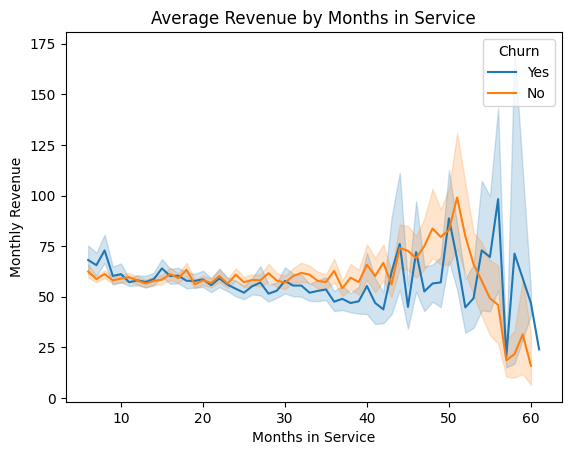

In [48]:
sns.lineplot(x='MonthsInService', y='MonthlyRevenue', hue='Churn', data=df)
plt.title('Average Revenue by Months in Service')
plt.xlabel('Months in Service')
plt.ylabel('Monthly Revenue')
plt.show()

This line plot shows the trend of average monthly revenue over different months in service for both churned and non-
churned customers. While both groups start with similar revenue patterns, around the 40–50-month mark, churned
customers (blue line) display slightly higher fluctuations in revenue compared to non-churned customers (orange line).
This could indicate revenue instability among long-term customers who are at risk of churning.

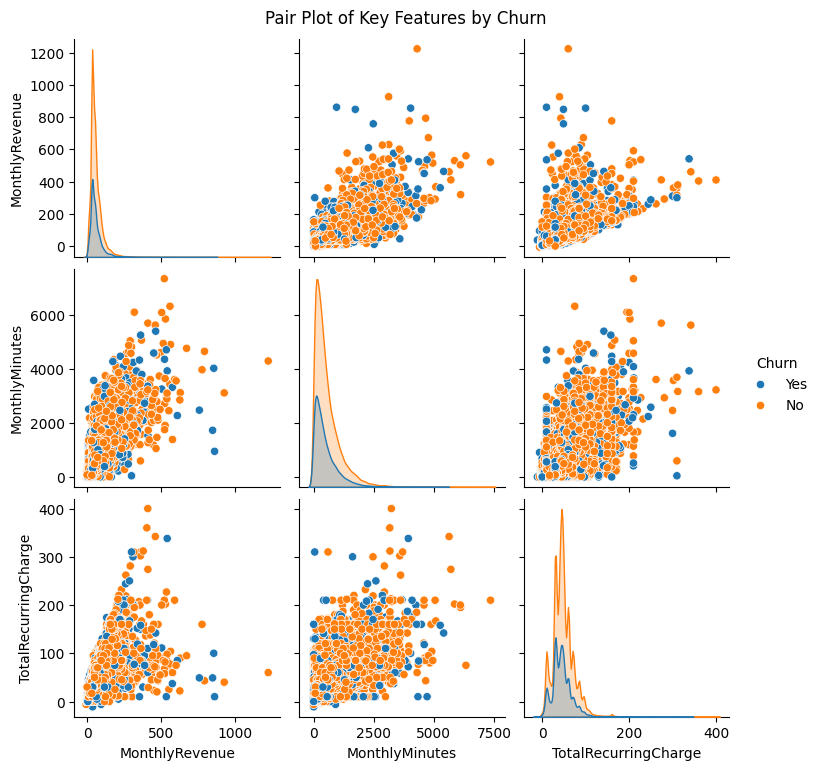

In [49]:
sns.pairplot(df, vars=['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge'], hue='Churn', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features by Churn', y=1.02)
plt.show()

1. Monthly Revenue vs. Monthly Minutes:
This plot shows a positive correlation between Monthly Revenue and Monthly Minutes, meaning that as customers use
more minutes, their revenue tends to increase. Both churned and non-churned customers follow a similar trend, though
churned customers seem to have slightly higher usage in some cases.
2. Monthly Revenue vs. Total Recurring Charge:
Monthly Revenue and Total Recurring Charge also display a positive relationship, as expected. Customers with higher
recurring charges tend to have higher monthly revenue. The distinction between churned and non-churned customers
isn’t very strong, indicating these features alone might not be definitive predictors of churn.
3. Monthly Minutes vs. Total Recurring Charge:
This plot also shows a positive relationship, as customers who spend more time on calls tend to have higher recurring
charges. Churned and non-churned customers are again mixed within this trend, suggesting no clear separation based on
these two variables alone.
4. Distributions along the diagonal:
The histograms and density plots along the diagonal show the individual distributions of each feature for churned and
non-churned customers. The churned and non-churned groups have similar distribution shapes, though churned
customers show slightly higher values in Monthly Revenue and Total Recurring Charge.

In [66]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_cols)

In [67]:
correlation = df.corr()['Churn'].abs().sort_values(ascending=False)
top_features = correlation[1:6].index
print("Top Features Related to Churn:\n", top_features)

Top Features Related to Churn:
 Index(['CurrentEquipmentDays', 'MadeCallToRetentionTeam', 'RetentionCalls',
       'HandsetWebCapable', 'TotalRecurringCharge'],
      dtype='object')


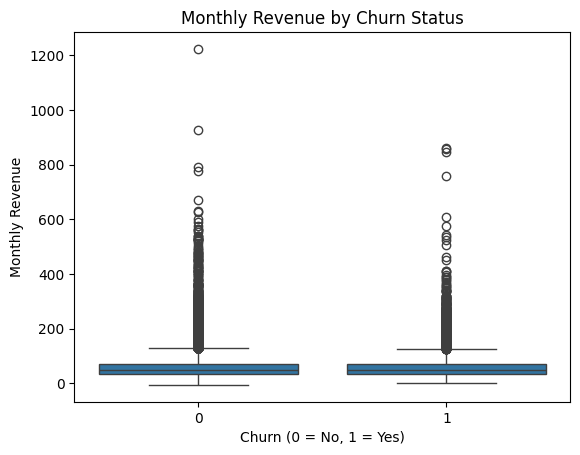

In [68]:
sns.boxplot(x='Churn', y='MonthlyRevenue', data=df)
plt.title('Monthly Revenue by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Revenue')
plt.show()

This box plot shows Monthly Revenue for churned (1) and non-churned (0) customers. Both groups have similar
revenue distributions, with most values low and a few high-revenue outliers. There’s a slight increase in median
revenue for churned customers, but revenue alone doesn’t clearly separate churners from non-churners.

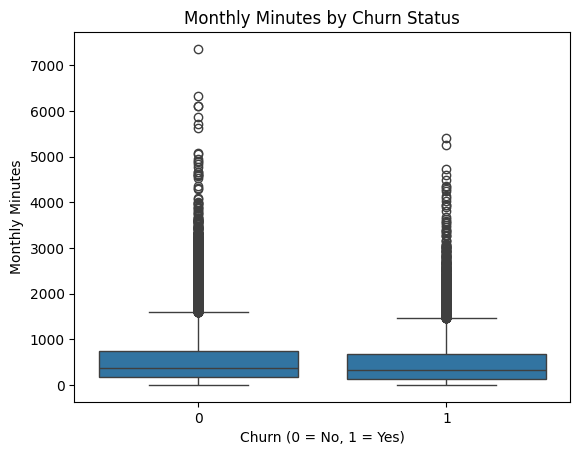

In [69]:
sns.boxplot(x='Churn', y='MonthlyMinutes', data=df)
plt.title('Monthly Minutes by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Minutes')
plt.show()

This box plot displays Monthly Minutes for customers who churned (1) and those who didn't (0). Both groups
have similar distributions, with a large concentration of minutes in the lower range and a few outliers with very
high usage. There is no strong indication that higher or lower monthly minutes significantly differ between
churned and non-churned groups, suggesting this feature alone might not be a strong predictor of churn.

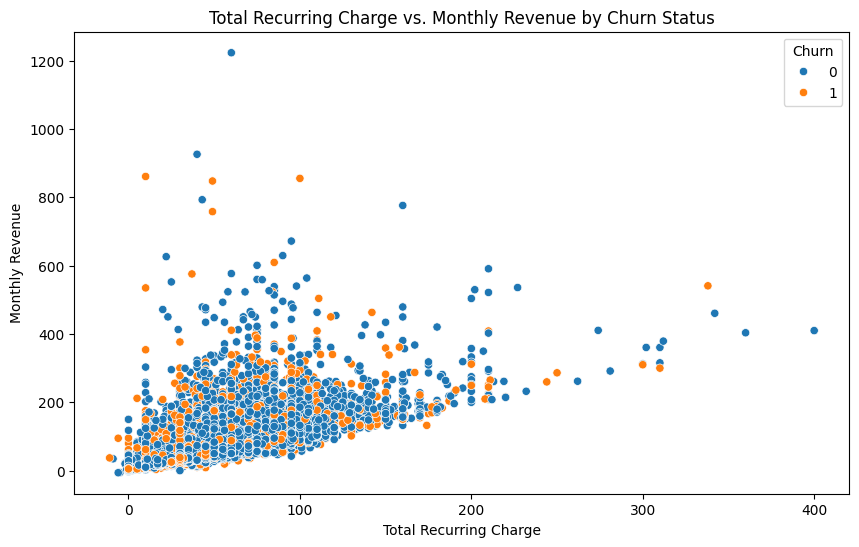

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalRecurringCharge', y='MonthlyRevenue', hue='Churn', data=df)
plt.title('Total Recurring Charge vs. Monthly Revenue by Churn Status')
plt.xlabel('Total Recurring Charge')
plt.ylabel('Monthly Revenue')
plt.legend(title='Churn')
plt.show()

This scatter plot illustrates the relationship between Total Recurring Charge and Monthly Revenue, with churn
status indicated by color (blue for retained, orange for churned customers). There’s a clear positive correlation:
higher Total Recurring Charges generally lead to higher Monthly Revenue. However, both churned and retained
customers are spread across various revenue levels. This suggests that high spending doesn’t necessarily
prevent churn, as even high-revenue customers sometimes leave. Therefore, additional factors beyond revenue
and recurring charges might be influencing churn, indicating the need for a deeper investigation into other
behavioral or service-related variables.

<ipython-input-71-2ce567c73534>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='MonthsInService', y='MonthlyRevenue', hue='Churn', data=df, ci=None)


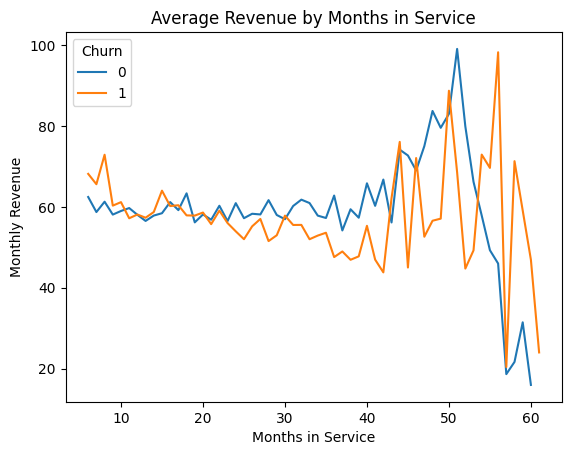

In [71]:
sns.lineplot(x='MonthsInService', y='MonthlyRevenue', hue='Churn', data=df, ci=None)
plt.title('Average Revenue by Months in Service')
plt.xlabel('Months in Service')
plt.ylabel('Monthly Revenue')
plt.show()

The plot shows average monthly revenue by months in service for churned and non-churned customers. Early on, both groups have similar revenue, but after about 20 months, churned customers' revenue begins to decline slightly, hinting at disengagement. In later months, churned customers display sharp revenue fluctuations, while non-churned customers maintain steadier revenue. This suggests that drops or erratic revenue patterns over time could signal a higher risk of churn, highlighting potential areas for targeted retention efforts.

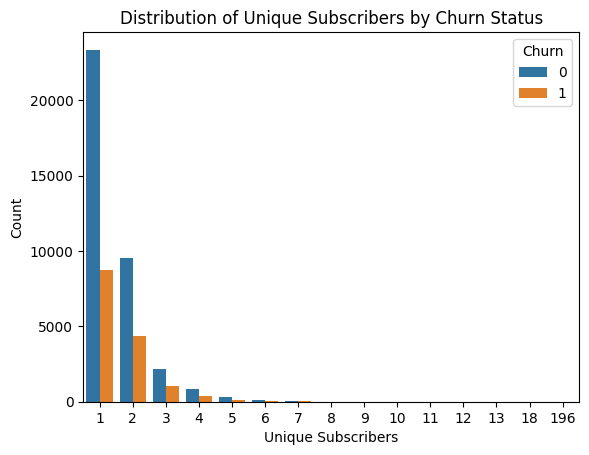

In [72]:
sns.countplot(x='UniqueSubs', hue='Churn', data=df)
plt.title('Distribution of Unique Subscribers by Churn Status')
plt.xlabel('Unique Subscribers')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

This plot shows the distribution of the number of unique subscribers by churn status. The majority of both churned and non-churned customers have only one subscriber on their account, with significantly more non-churned accounts in this category. As the number of unique subscribers increases, the count for both churned and non-churned customers decreases sharply, indicating that accounts with multiple unique subscribers are less common. The pattern suggests that customers with more subscribers may have a lower likelihood of churning, but the correlation isn’t strong due to the low counts in higher subscriber categories.

segmentation

In [58]:
df = df.dropna

In [73]:
features = df[['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
               'MonthsInService', 'UniqueSubs', 'Handsets']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

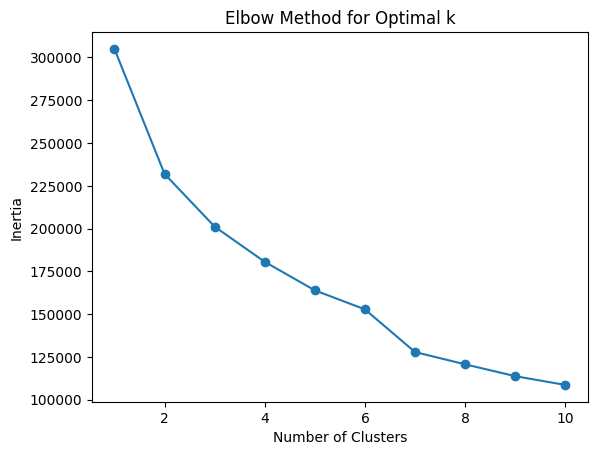

In [74]:
scaled_features = scaled_features[~np.isnan(scaled_features).any(axis=1)]
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

This Elbow Method plot shows the relationship between the number of clusters (k) and the inertia (within-cluster sum of squares). The "elbow" point, where the rate of decrease in inertia slows down, is typically the optimal number of clusters. In this plot, the curve starts flattening around \( k = 4 \) to \( k = 5 \), suggesting that these cluster counts may provide a good balance between grouping data points closely within clusters and not using an excessive number of clusters.

         MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
Cluster                                                         
0             -0.293360       -0.377553             -0.354240   
1              1.536276        1.642720              1.366647   
2             -0.281615       -0.273470             -0.210243   

         MonthsInService  UniqueSubs  Handsets  
Cluster                                         
0               1.210193    0.032868  0.470500  
1              -0.023197    0.004136  0.675265  
2              -0.523916   -0.015866 -0.384652  


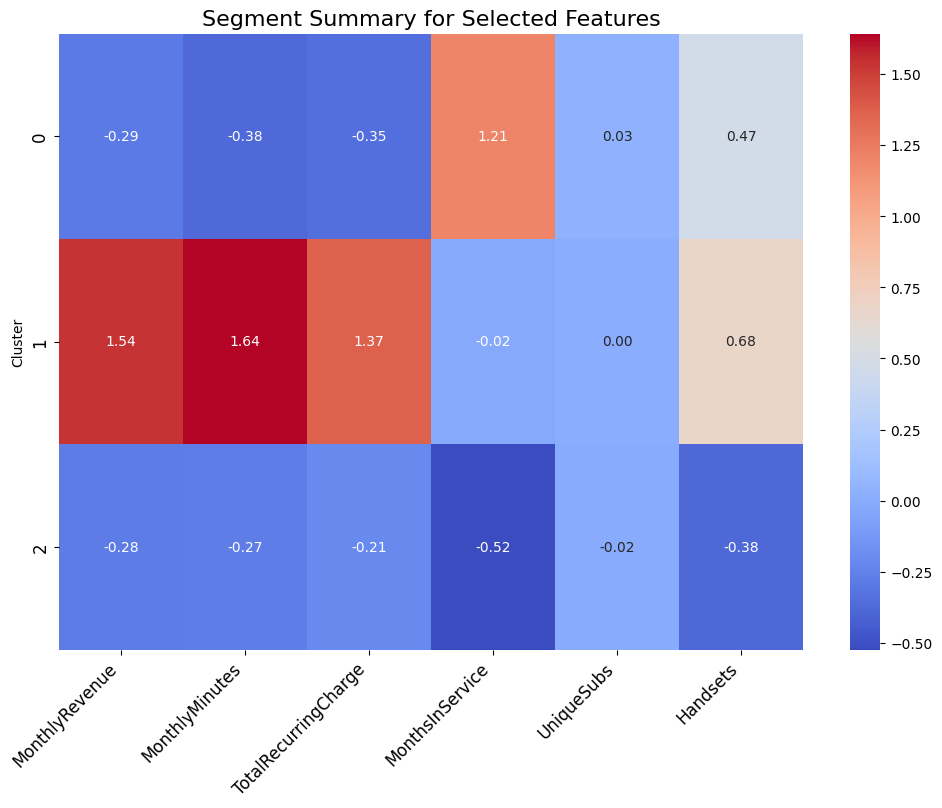

In [77]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features_df['Cluster'] = labels
segment_summary = scaled_features_df.groupby('Cluster').mean()
print(segment_summary)
selected_features = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
                     'MonthsInService', 'UniqueSubs', 'Handsets']
segment_summary_filtered = segment_summary[selected_features]
plt.figure(figsize=(12, 8))
sns.heatmap(segment_summary_filtered, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Segment Summary for Selected Features", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

This heatmap visualizes the average values of selected features across different customer segments. Each segment represents a distinct customer group based on their behavior and usage patterns:

- **Segment 0**: Shows moderate Monthly Minutes and Monthly Revenue with average Months in Service, indicating a balanced usage and average service period.
- **Segment 1**: Stands out with the highest Monthly Minutes (1388.43) and higher Monthly Revenue and Total Recurring Charge, suggesting heavy users with a strong potential for high engagement or churn.
- **Segment 2**: Similar to Segment 0 in Monthly Revenue and Total Recurring Charge but with more Unique Subs, indicating potentially shared plans.
- **Segment 3**: Has zero Monthly Minutes, high Total Recurring Charge, and significantly high Unique Subs, indicating customers who may hold multiple subscriptions but have low usage.

This segmentation helps identify target groups for tailored retention strategies, such as focusing on Segment 1 for loyalty incentives and Segment 3 for engagement strategies.

<ipython-input-89-6056c7af34ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='MonthlyRevenue', data=df, palette='Set3')


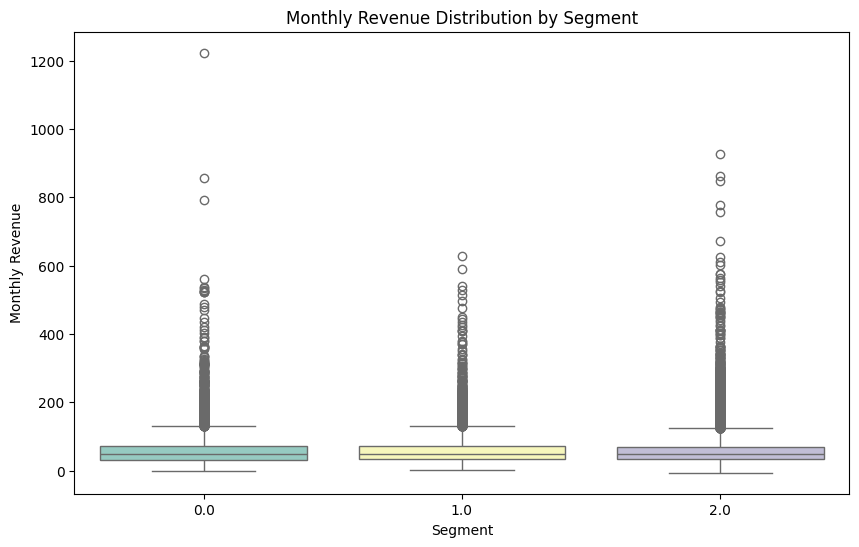

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='MonthlyRevenue', data=df, palette='Set3')
plt.title('Monthly Revenue Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Monthly Revenue')
plt.show()

<ipython-input-80-1447a3f4a669>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='MonthlyRevenue', data=df, palette='Set3')


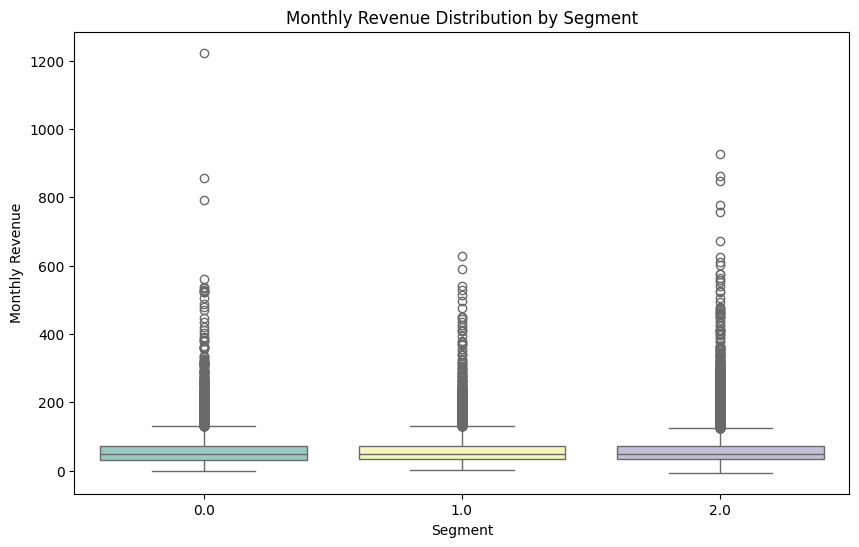

In [80]:
df['Segment'] = scaled_features_df['Cluster']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='MonthlyRevenue', data=df, palette='Set3')
plt.title('Monthly Revenue Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Monthly Revenue')
plt.show()

This boxplot illustrates the distribution of Monthly Revenue across the different customer segments:

- **Segment 1** has the highest median Monthly Revenue, with a significant number of high-revenue outliers, indicating this segment includes heavy spenders.
- **Segments 0 and 2** show relatively lower Monthly Revenue, with fewer outliers, suggesting moderate usage and spending patterns.
- **Segment 3** has the lowest revenue distribution, with minimal variance, indicating low engagement or possibly minimal service usage.

This plot highlights the revenue potential within each segment, identifying Segment 1 as a valuable group for retention efforts due to their higher spending. Segment 3 could be a target for engagement strategies to increase revenue.

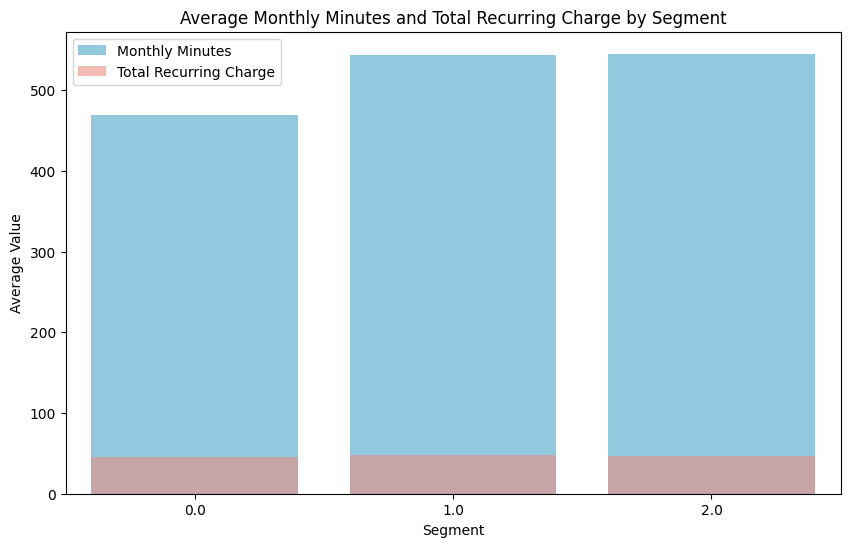

In [81]:
segment_means = df.groupby('Segment')[['MonthlyMinutes', 'TotalRecurringCharge']].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='MonthlyMinutes', data=segment_means, color='skyblue', label='Monthly Minutes')
sns.barplot(x='Segment', y='TotalRecurringCharge', data=segment_means, color='salmon', label='Total Recurring Charge', alpha=0.6)
plt.title('Average Monthly Minutes and Total Recurring Charge by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Value')
plt.legend()
plt.show()

This bar chart shows the average Monthly Minutes and Total Recurring Charge for each customer segment:

- **Segment 1** has the highest average Monthly Minutes by far, indicating that this group heavily utilizes the service. However, their Total Recurring Charge remains relatively low compared to usage, possibly implying they are on high-usage plans or receive special rates.
- **Segments 0 and 2** have moderate Monthly Minutes with similarly modest Total Recurring Charges, reflecting balanced usage and spending.
- **Segment 3** has very low Monthly Minutes and Total Recurring Charge, suggesting minimal engagement with the service.

Insights from this chart suggest focusing on increasing the Total Recurring Charge for Segment 1 users through upsell opportunities, while Segment 3 may need engagement strategies to boost usage and spending.

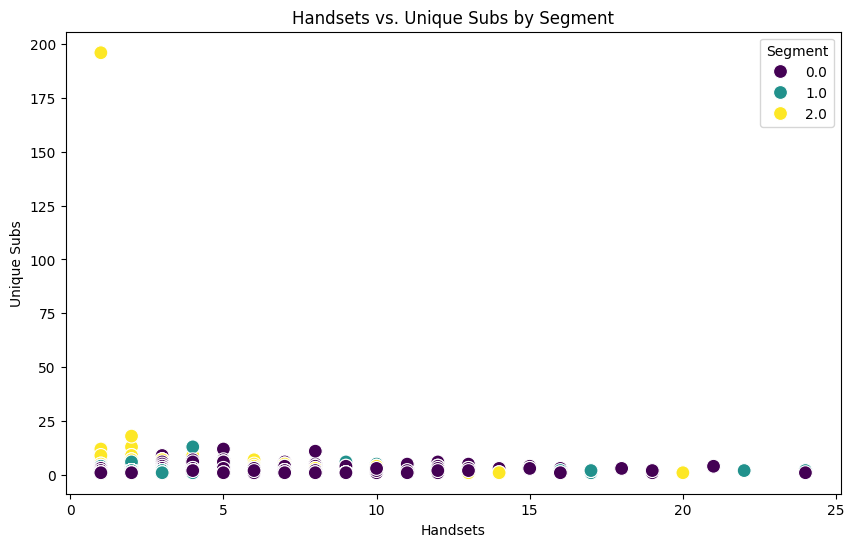

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Handsets', y='UniqueSubs', hue='Segment', data=df, palette='viridis', s=100)
plt.title('Handsets vs. Unique Subs by Segment')
plt.xlabel('Handsets')
plt.ylabel('Unique Subs')
plt.legend(title='Segment')
plt.show()

This scatter plot visualizes the relationship between the number of handsets and unique subscribers across different customer segments:

- **Segments 0, 1, and 2** generally have fewer handsets and unique subscribers, with most data points clustered around low values for both variables.
- **Segment 3** stands out with a notable data point where a customer has an exceptionally high number of unique subscribers (close to 200) with only one handset. This might indicate an atypical usage pattern or data anomaly.

The plot highlights that most segments maintain a relatively low count of handsets and unique subscribers, suggesting that only a few customers have multiple subscriptions or devices. Segment 3’s outlier warrants further investigation to understand if it represents unique customer behavior or an error in data collection.

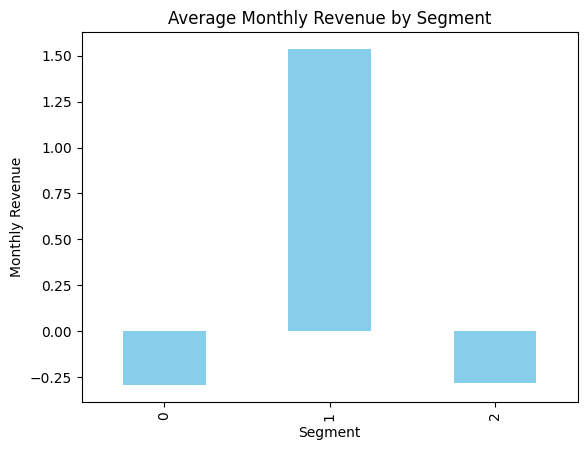

In [83]:
segment_summary['MonthlyRevenue'].plot(kind='bar', color='skyblue')
plt.title("Average Monthly Revenue by Segment")
plt.xlabel("Segment")
plt.ylabel("Monthly Revenue")
plt.show()

This bar chart shows the average monthly revenue across different customer segments:

- **Segment 1** generates the highest monthly revenue, indicating this group has the highest spending or usage patterns among all segments.
- **Segment 3** has moderate revenue, followed by **Segment 2** and **Segment 0**, which have lower average revenues.
- The distinct revenue differences among segments suggest varying levels of service usage or subscription plans, with Segment 1 potentially representing high-value customers.

This insight can guide targeted strategies, with Segment 1 being prioritized for retention efforts, while other segments may benefit from upselling initiatives to increase their revenue contribution.

In [84]:
null_values = df.isnull().sum()
null_values[null_values > 0]

,0
MonthlyRevenue,156
MonthlyMinutes,156
TotalRecurringCharge,156
DirectorAssistedCalls,156
OverageMinutes,156
RoamingCalls,156
PercChangeMinutes,367
PercChangeRevenues,367
Handsets,1
HandsetModels,1


In [85]:
unique_values = df.nunique()
print(unique_values)

CustomerID                   51047
Churn                            2
MonthlyRevenue               12665
MonthlyMinutes                2719
TotalRecurringCharge           214
DirectorAssistedCalls          146
OverageMinutes                 746
RoamingCalls                   530
PercChangeMinutes             2262
PercChangeRevenues            2899
DroppedCalls                   285
BlockedCalls                   373
UnansweredCalls                840
CustomerCareCalls              185
ThreewayCalls                   78
ReceivedCalls                 6121
OutboundCalls                  787
InboundCalls                   472
PeakCallsInOut                1839
OffPeakCallsInOut             1669
DroppedBlockedCalls            447
CallForwardingCalls             31
CallWaitingCalls               223
MonthsInService                 56
UniqueSubs                      15
ActiveSubs                      12
ServiceArea                    748
Handsets                        23
HandsetModels       

In [86]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_cols)

In [87]:
df = df.dropna()

#Statistical Test

In [91]:
normality_results = {}
for col in df.select_dtypes(include='number').columns:
    stat, p_value = stats.shapiro(df[col])
    normality_results[col] = {'Statistic': stat, 'P-Value': p_value,
                              'Is_Normal': p_value > 0.05}

# Create a DataFrame from the normality results
normality_results = {}
for col in df.select_dtypes(include='number').columns:
    stat, p_value = stats.shapiro(df[col])
    normality_results[col] = {'Statistic': stat, 'P-Value': p_value,
                              'Is_Normal': p_value > 0.05}

# Create a DataFrame from the normality results
normality_df = pd.DataFrame.from_dict(normality_results, orient='index')

# Display the DataFrame
print("Normality Test Results:")
print(normality_df)
print("Normality Test Results:")
normality_d

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 49699.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 49699.
  res = hypotest_fun_out(*samples, **kwds)


Normality Test Results:
                           Statistic        P-Value  Is_Normal
CustomerID                  0.951896   2.715286e-79      False
Churn                       0.566634  2.655069e-137      False
MonthlyRevenue              0.713674  3.921416e-125      False
MonthlyMinutes              0.806748  4.051266e-114      False
TotalRecurringCharge        0.906262   3.393527e-95      False
DirectorAssistedCalls       0.397611  2.218310e-147      False
OverageMinutes              0.434358  1.996036e-145      False
RoamingCalls                0.078770  6.481527e-161      False
PercChangeMinutes           0.807284  4.824978e-114      False
PercChangeRevenues          0.575472  1.103146e-136      False
DroppedCalls                0.620399  2.375495e-133      False
BlockedCalls                0.354467  1.524828e-149      False
UnansweredCalls             0.651345  7.617759e-131      False
CustomerCareCalls           0.371037  9.957031e-149      False
ThreewayCalls               0.2

,Statistic,P-Value,Is_Normal
CustomerID,0.951896,2.715286e-79,False
Churn,0.566634,2.655069e-137,False
MonthlyRevenue,0.713674,3.921416e-125,False
MonthlyMinutes,0.806748,4.051266e-114,False
TotalRecurringCharge,0.906262,3.393527e-95,False
DirectorAssistedCalls,0.397611,2.218310e-147,False
OverageMinutes,0.434358,1.996036e-145,False
RoamingCalls,0.078770,6.481527e-161,False
PercChangeMinutes,0.807284,4.824978e-114,False
PercChangeRevenues,0.575472,1.103146e-136,False


This table displays the results of a normality test for various columns in the dataset, indicating whether each column follows a normal distribution.

- **Statistic and P-Value**: These values reflect the test outcome, where a low p-value (usually less than 0.05) indicates the data significantly deviates from normality.
- **Is_Normal**: A "False" value across all features here shows that none of these variables follow a normal distribution.


In [93]:
def analyze_outliers(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    univariate_outliers = []
    multivariate_potential = []

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if not df[(df[col] < lower_bound) | (df[col] > upper_bound)].empty:
            univariate_outliers.append(col)
    if len(numerical_cols) > 1:
        for i in range(len(numerical_cols) - 1):
            col1 = numerical_cols[i]
            col2 = numerical_cols[i + 1]
            correlation = df[[col1, col2]].corr().iloc[0, 1]
            if abs(correlation) > 0.5:
                multivariate_potential.append((col1, col2))

    return univariate_outliers, multivariate_potential
univariate_outliers, multivariate_potential = analyze_outliers(df)

print("\nPotential Univariate Outliers :")
print(univariate_outliers)

print("\nPotential Multivariate Outliers (Column Pairs):")
print(multivariate_potential)



Potential Univariate Outliers :
['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'MadeCallToRetentionTeam', 'Occupation']

Potential Multivariate Outliers (Column Pairs):
[('MonthlyRevenue', 'MonthlyMinutes'), ('MonthlyMinutes', 'TotalRecurring

In [94]:
def count_univariate_outliers(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    outlier_counts = {}

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)

    return outlier_counts

# Get the outlier counts
outlier_counts = count_univariate_outliers(df)

# Display the results
outlier_df = pd.DataFrame(outlier_counts.items(), columns=['Column', 'Outlier Count'])
print(outlier_df)

                       Column  Outlier Count
0                  CustomerID              0
1                       Churn              0
2              MonthlyRevenue           2909
3              MonthlyMinutes           2516
4        TotalRecurringCharge            796
5       DirectorAssistedCalls           5374
6              OverageMinutes           5795
7                RoamingCalls           8612
8           PercChangeMinutes           6676
9          PercChangeRevenues          13011
10               DroppedCalls           3613
11               BlockedCalls           5379
12            UnansweredCalls           3526
13          CustomerCareCalls           6569
14              ThreewayCalls           4486
15              ReceivedCalls           3542
16              OutboundCalls           3249
17               InboundCalls           4835
18             PeakCallsInOut           2756
19          OffPeakCallsInOut           3526
20        DroppedBlockedCalls           3826
21        

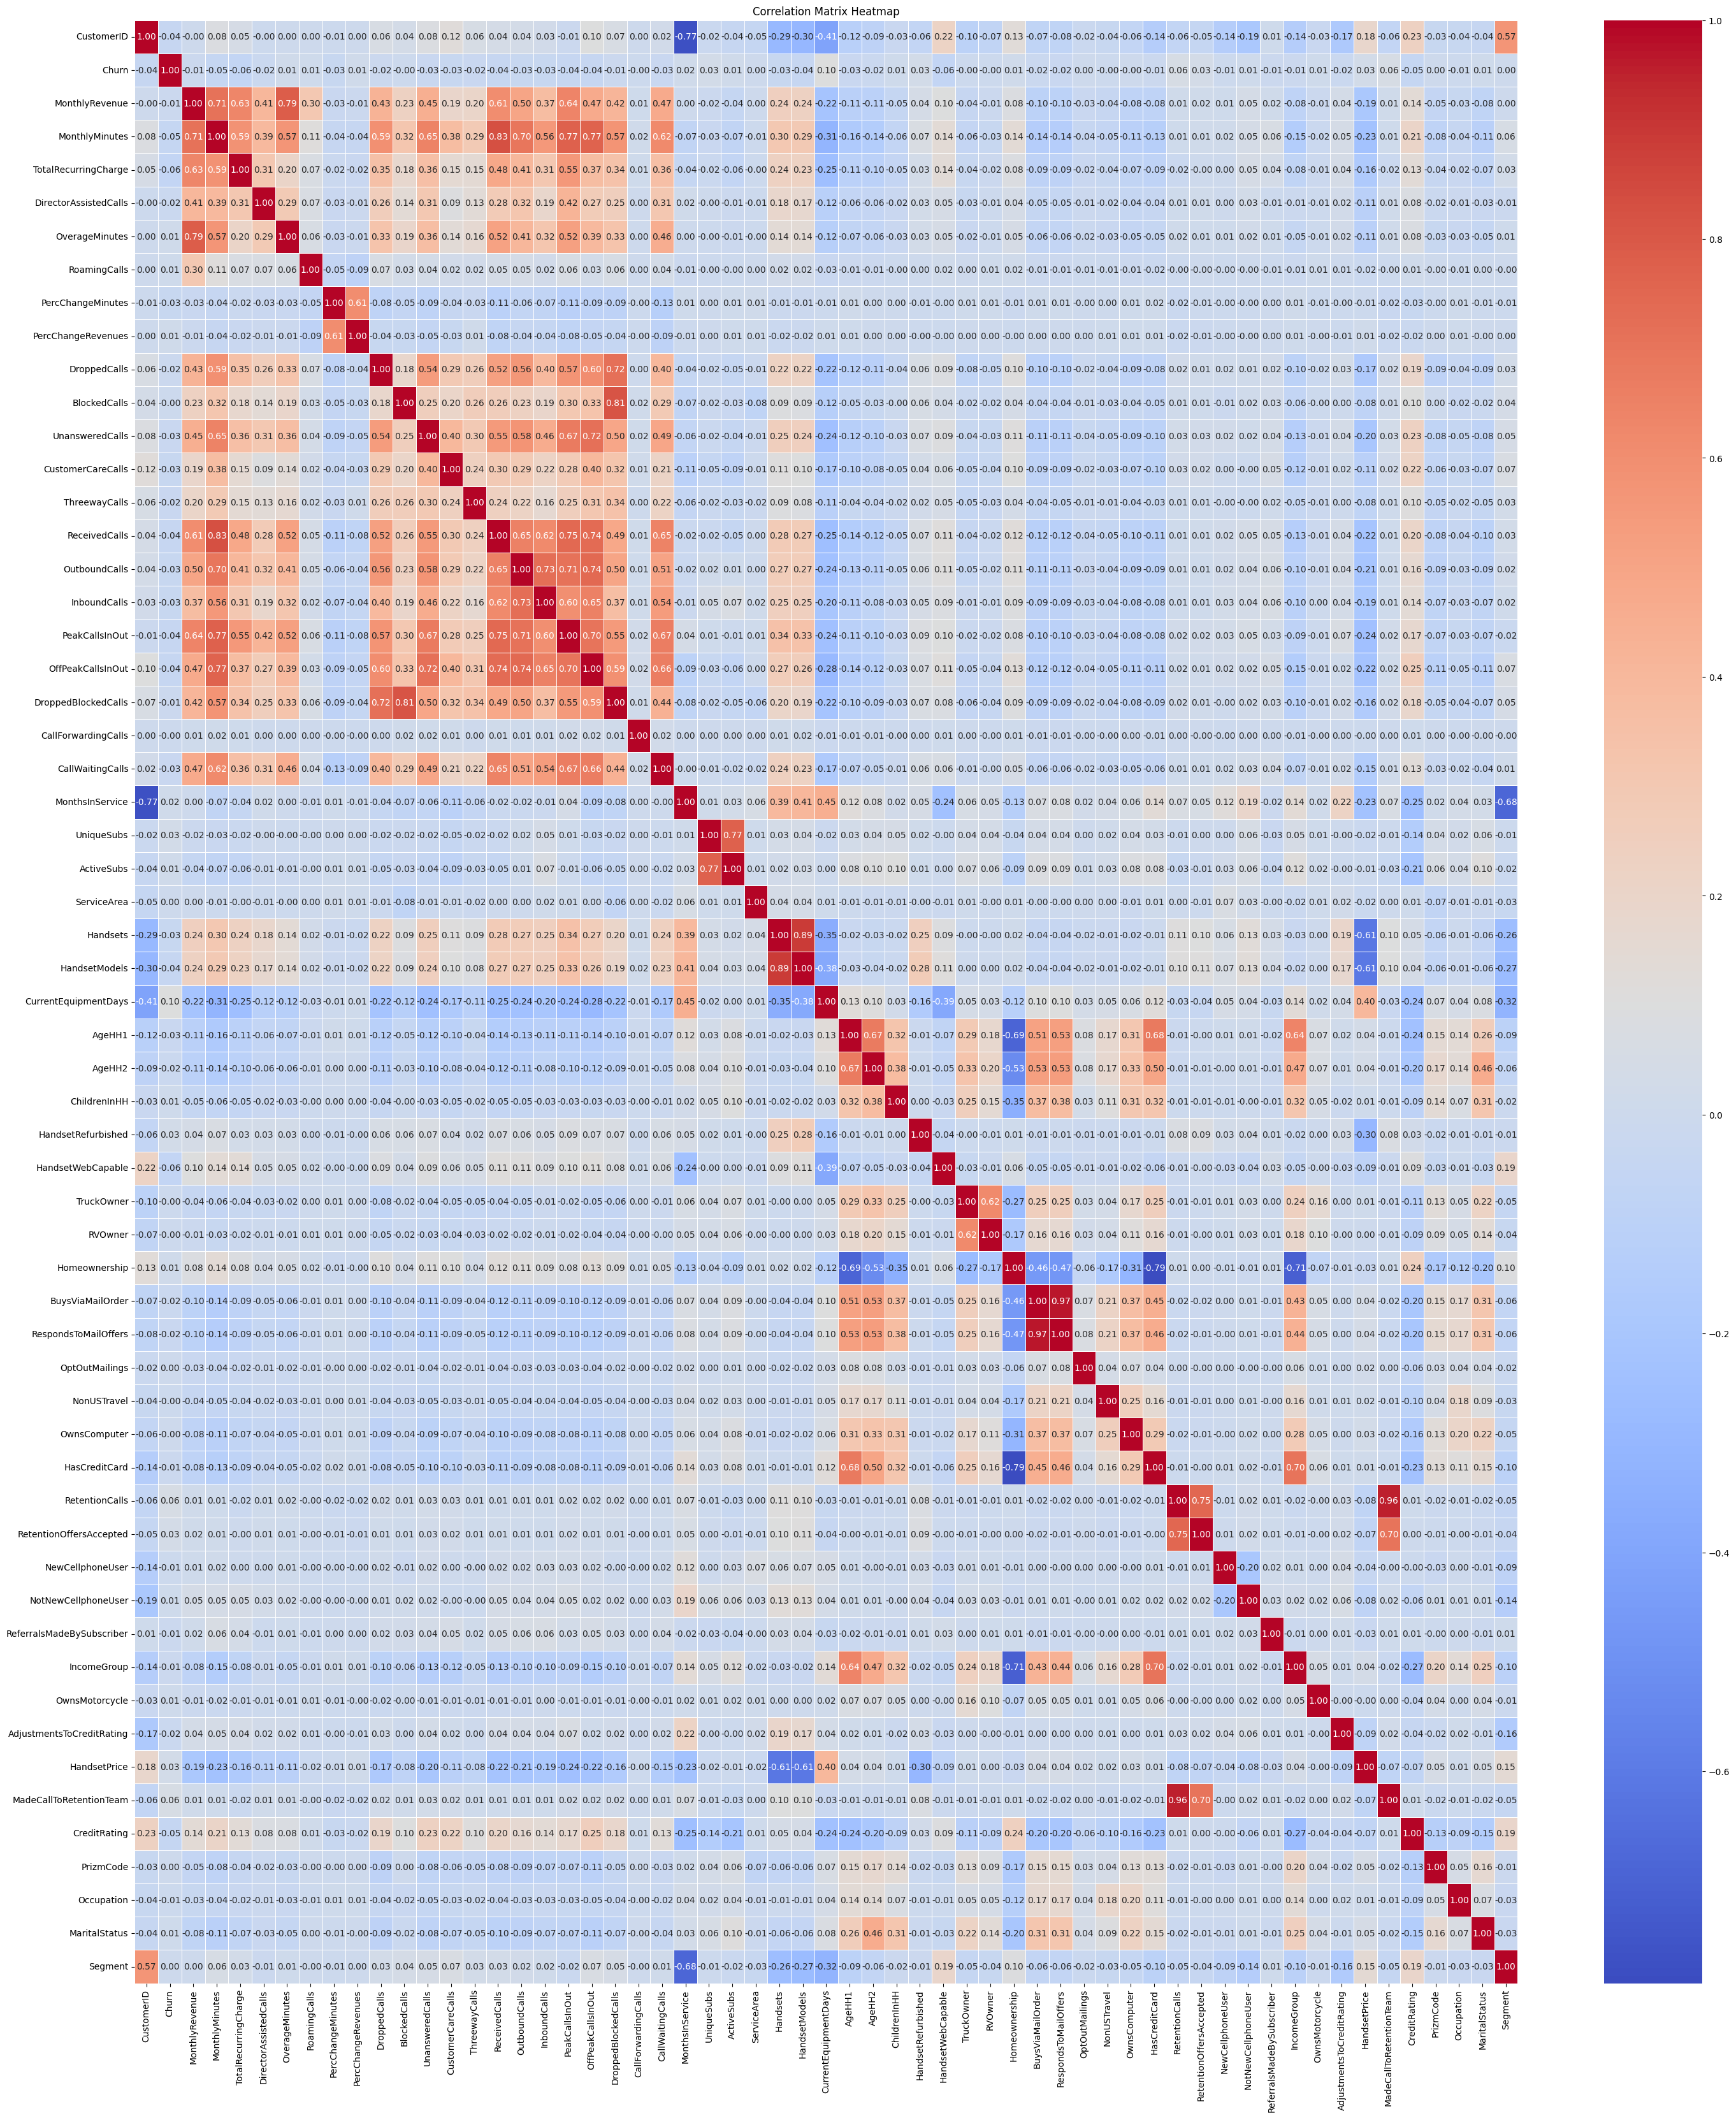

In [95]:
correlation_matrix = df.corr()
plt.figure(figsize=(35, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [96]:
df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [97]:
columns_to_keep = [
    'Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
    'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
    'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
    'PeakCallsInOut', 'OffPeakCallsInOut','MonthsInService', 'UniqueSubs',
    'ActiveSubs', 'ServiceArea','CreditRating', 'IncomeGroup'
]
df = df[columns_to_keep]

In [98]:
df.rename(columns={'OverageMinutes': 'AverageMinutes'}, inplace=True)

In [99]:
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,AverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,CreditRating,IncomeGroup
0,1,24.00,219.0,22.0,0.0,0.0,-157.0,-19.0,0.0,97.2,0.0,0.0,58.0,24.0,61,2,1,658,0,4
1,1,16.99,10.0,17.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,58,1,1,610,3,5
2,0,38.00,8.0,38.0,0.0,0.0,-2.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,60,1,1,352,2,6
3,0,82.28,1312.0,75.0,0.0,0.0,157.0,8.1,1.3,200.3,370.3,147.0,555.7,303.7,59,2,2,610,3,6
4,1,17.14,0.0,17.0,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,563,0,9


In [100]:
df.shape

(49699, 20)

In [105]:
def count_univariate_outliers(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    outlier_counts = {}
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts #The indentation of this line was corrected

import pandas as pd # Import the pandas library for dataframe operations
outlier_counts = count_univariate_outliers(df)
outlier_df = pd.DataFrame(outlier_counts.items(), columns=['Column', 'Outlier Count'])
print(outlier_df)
# Removed the repeated block of code that was causing the indentation error

                  Column  Outlier Count
0                  Churn              0
1         MonthlyRevenue           2909
2         MonthlyMinutes           2516
3   TotalRecurringCharge            796
4         AverageMinutes           5795
5           RoamingCalls           8612
6      PercChangeMinutes           6676
7     PercChangeRevenues          13011
8          ThreewayCalls           4486
9          ReceivedCalls           3542
10         OutboundCalls           3249
11          InboundCalls           4835
12        PeakCallsInOut           2756
13     OffPeakCallsInOut           3526
14       MonthsInService           1152
15            UniqueSubs           1790
16            ActiveSubs            564
17           ServiceArea              0
18          CreditRating              0
19           IncomeGroup              0


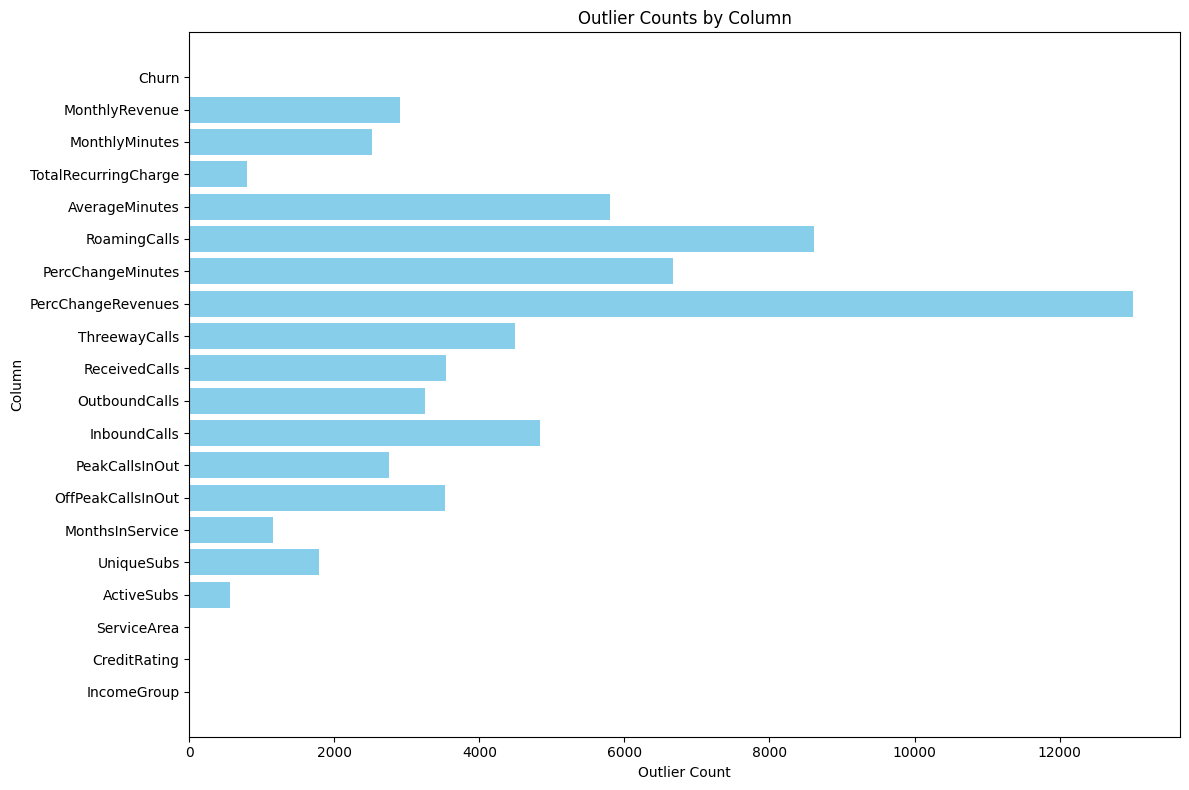

In [106]:
plt.figure(figsize=(12, 8))
plt.barh(outlier_df['Column'], outlier_df['Outlier Count'], color='skyblue')
plt.xlabel('Outlier Count')
plt.ylabel('Column')
plt.title('Outlier Counts by Column')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The outlier count summary shows the number of data points in each column that fall outside the
expected range based on the Interquartile Range (IQR) method. Columns with higher outlier counts,
such as PercChange Revenues (13,017) and Roaming Calls (8,616), have many values that
deviate significantly from the rest of the data. This indicates unusual values or possible anomalies
in these fields.
In contrast, some columns like AgeHH1, AgeHH2, and Income Group have zero outliers,
meaning their values are within the expected range without any extreme deviations. This count
helps identify columns that may need special handling or transformation to manage outliers
effectively in the dataset.

In [107]:
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)

In [108]:
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,AverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,CreditRating,IncomeGroup
0,1,24.00,219.0,22.0,0.0,0.0,-157.0,-19.0,0.0,97.2,0.0,0.0,58.0,24.0,61,2,1,658,0,4
1,1,16.99,10.0,17.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,58,1,1,610,3,5
2,0,38.00,8.0,38.0,0.0,0.0,-2.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,60,1,1,352,2,6
3,0,82.28,1312.0,75.0,0.0,0.0,157.0,8.1,1.3,200.3,370.3,147.0,555.7,303.7,59,2,2,610,3,6
4,1,17.14,0.0,17.0,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,563,0,9


In [109]:
numeric_cols = df.select_dtypes(include=['number']).columns
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
shifted_data = df + abs(df.min())
df[numeric_cols] = shifted_data
df[numeric_cols] = df[numeric_cols].round(3)

In [110]:
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,AverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,CreditRating,IncomeGroup
0,1.0,0.809,0.389,0.933,0.0,0.0,25.122,126.593,0.000,0.670,0.000,0.000,0.594,0.309,4.231,1.0,1.0,2.022,0.0,0.667
1,1.0,0.621,0.018,0.767,0.0,0.0,26.155,128.802,0.000,0.000,0.000,0.000,0.051,0.013,4.000,0.0,1.0,1.874,1.5,0.833
2,0.0,1.184,0.014,1.467,0.0,0.0,26.169,128.802,0.000,0.003,0.010,0.000,0.013,0.048,4.154,0.0,1.0,1.081,1.0,1.000
3,0.0,2.372,2.328,2.700,0.0,0.0,27.243,129.744,4.333,1.381,12.062,15.806,5.688,3.909,4.077,1.0,2.0,1.874,1.5,1.000
4,1.0,0.625,0.000,0.767,0.0,0.0,26.182,128.779,0.000,0.000,0.000,0.000,0.000,0.000,3.615,1.0,2.0,1.730,0.0,1.500


In [111]:
correlation_matrix = df.corr()
print(correlation_matrix)

                         Churn  MonthlyRevenue  MonthlyMinutes  \
Churn                 1.000000       -0.012319       -0.050211   
MonthlyRevenue       -0.012319        1.000000        0.712320   
MonthlyMinutes       -0.050211        0.712320        1.000000   
TotalRecurringCharge -0.058885        0.630620        0.585851   
AverageMinutes        0.014931        0.787207        0.568798   
RoamingCalls          0.011005        0.304539        0.112155   
PercChangeMinutes    -0.033213       -0.026615       -0.044004   
PercChangeRevenues    0.013005       -0.013647       -0.038192   
ThreewayCalls        -0.023628        0.201036        0.287582   
ReceivedCalls        -0.037050        0.605532        0.828831   
OutboundCalls        -0.032293        0.495531        0.695008   
InboundCalls         -0.033800        0.373670        0.558501   
PeakCallsInOut       -0.039403        0.642509        0.772761   
OffPeakCallsInOut    -0.040799        0.473658        0.765479   
MonthsInSe

In [113]:
correlation_matrix = df.corr()
independent_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) < 0.1:
            independent_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))
independent_pairs

[('MonthlyRevenue', 'Churn', -0.01231949366025343),
 ('MonthlyMinutes', 'Churn', -0.05021051480776981),
 ('TotalRecurringCharge', 'Churn', -0.058884629657147),
 ('AverageMinutes', 'Churn', 0.014930944426988073),
 ('RoamingCalls', 'Churn', 0.011004603894373983),
 ('RoamingCalls', 'TotalRecurringCharge', 0.07393839617411464),
 ('RoamingCalls', 'AverageMinutes', 0.06339474523792833),
 ('PercChangeMinutes', 'Churn', -0.03321277803992057),
 ('PercChangeMinutes', 'MonthlyRevenue', -0.02661459118132551),
 ('PercChangeMinutes', 'MonthlyMinutes', -0.04400361058663566),
 ('PercChangeMinutes', 'TotalRecurringCharge', -0.01626504867647658),
 ('PercChangeMinutes', 'AverageMinutes', -0.02575724673244575),
 ('PercChangeMinutes', 'RoamingCalls', -0.05487323016224774),
 ('PercChangeRevenues', 'Churn', 0.01300514212382899),
 ('PercChangeRevenues', 'MonthlyRevenue', -0.013646868663946349),
 ('PercChangeRevenues', 'MonthlyMinutes', -0.03819182682876094),
 ('PercChangeRevenues', 'TotalRecurringCharge', -0.

In [114]:
X = df.drop('Churn', axis=1)
y = df['Churn']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y)
selected_features = X.columns[(lasso.coef_ != 0)]
print("Selected Features:")
print(selected_features)
X_selected = df[selected_features]
X_selected.to_csv('selected_features.csv', index=False)
print("\nLasso Coefficients:")
print(lasso.coef_)

Selected Features:
Index(['MonthlyMinutes', 'TotalRecurringCharge', 'AverageMinutes',
       'PercChangeMinutes', 'UniqueSubs', 'CreditRating'],
      dtype='object')

Lasso Coefficients:
[ 0.         -0.00492926 -0.01313533  0.00279863  0.         -0.00568055
  0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.003192    0.          0.         -0.00885022
 -0.        ]


Class Counts:
 Churn
0.0    35463
1.0    14236
Name: count, dtype: int64


<ipython-input-115-7d9a43e8d6d1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


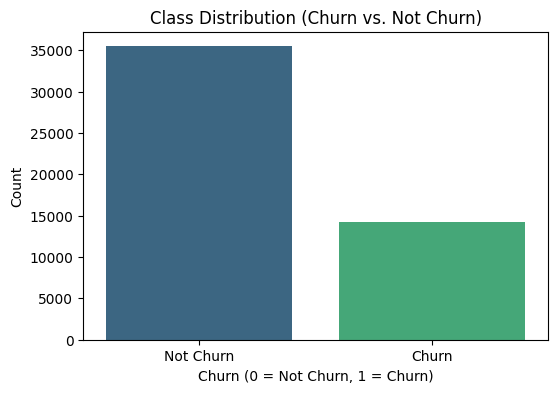

In [115]:
class_counts = df['Churn'].value_counts()
print("Class Counts:\n", class_counts)
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Churn (0 = Not Churn, 1 = Churn)')
plt.ylabel('Count')
plt.title('Class Distribution (Churn vs. Not Churn)')
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.show()

In [116]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Before SMOTE:
Churn
0.0    24742
1.0    10047
Name: count, dtype: int64

After SMOTE:
Churn
1.0    24742
0.0    24742
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81     10721
         1.0       0.43      0.24      0.31      4189

    accuracy                           0.70     14910
   macro avg       0.59      0.56      0.56     14910
weighted avg       0.66      0.70      0.67     14910

Accuracy: 0.698


Random Forrest with SMOTE

Precision:
Churn = No (0.0): 0.74
Churn = Yes (1.0): 0.42

Recall:
Churn = No (0.0): 0.87
Churn = Yes (1.0): 0.24

F1-score:
Churn = No (0.0): 0.80
Churn = Yes (1.0): 0.30

Accuracy:0.69

This model achieved a good recall for non-churned customers (0.87) but performed lower on
churned customers (recall of 0.24), indicating that it better identified customers likely to stay than
those likely to leave.

In [117]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Before SMOTE:
Churn
0.0    24742
1.0    10047
Name: count, dtype: int64

After SMOTE:
Churn
1.0    24742
0.0    24742
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81     10721
         1.0       0.43      0.24      0.31      4189

    accuracy                           0.70     14910
   macro avg       0.59      0.56      0.56     14910
weighted avg       0.66      0.70      0.67     14910

Accuracy: 0.698


Random Forest with Class Weights Balanced

Precision:
Churn = No (0.0): 0.74
Churn = Yes (1.0): 0.42

Recall:
Churn = No (0.0): 0.87
Churn = Yes (1.0): 0.24

F1-score:
Churn = No (0.0): 0.80
Churn = Yes (1.0): 0.30

Accuracy: 0.69

The performance was identical to Random Forest with SMOTE, showing that class weighting did not
improve recall for churned customers.

In [120]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", y_train_resampled.value_counts())
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.3f}")

Class distribution after SMOTE: Churn
1.0    24742
0.0    24742
Name: count, dtype: int64
Confusion Matrix:
[[5391 5330]
 [1649 2540]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.50      0.61     10721
         1.0       0.32      0.61      0.42      4189

    accuracy                           0.53     14910
   macro avg       0.54      0.55      0.51     14910
weighted avg       0.64      0.53      0.55     14910


Accuracy: 0.532


Logistic Regression with SMOTE

Precision:
Churn = No (0.0): 0.76
Churn = Yes (1.0): 0.32

Recall:
Churn = No (0.0): 0.49
Churn = Yes (1.0): 0.61

F1-score:
Churn = No (0.0): 0.60
Churn = Yes (1.0): 0.42

Accuracy:0.53

Logistic regression with SMOTE achieved a much higher recall for churned customers (0.61), but
the overall accuracy was lower at 0.53. This model prioritizes identifying churners, albeit with a
trade-off in accuracy.

In [122]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", y_train_resampled.value_counts())
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.3f}")

Class distribution after SMOTE: Churn
1.0    24742
0.0    24742
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:51:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[9655 1066]
 [3308  881]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.90      0.82     10721
         1.0       0.45      0.21      0.29      4189

    accuracy                           0.71     14910
   macro avg       0.60      0.56      0.55     14910
weighted avg       0.66      0.71      0.67     14910


Accuracy: 0.707


XGBoost model

Precision:
Churn = No (0.0): 0.74
Churn = Yes (1.0): 0.45

Recall:
Churn = No (0.0): 0.90
Churn = Yes (1.0): 0.21

F1-score:
Churn = No (0.0): 0.82
Churn = Yes (1.0): 0.29

Accuracy: 0.71

XGBoost performed well in identifying non-churned customers (recall of 0.90), but it struggled with
identifying churned customers, with a low recall of 0.21.

In [121]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    class_weight='balanced',
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgbm_model.fit(X_train_resampled, y_train_resampled)
y_pred = lgbm_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.3f}"

[LightGBM] [Info] Number of positive: 24742, number of negative: 24742
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4833
[LightGBM] [Info] Number of data points in the train set: 49484, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

LightGBM with SMOTE

Precision:
Churn = No (0.0): 0.74
Churn = Yes (1.0): 0.49

Recall:
Churn = No (0.0): 0.94
Churn = Yes (1.0): 0.15

F1-score:
Churn = No (0.0): 0.83
Churn = Yes (1.0): 0.23

Accuracy: 0.72

LightGBM achieved the highest accuracy (0.72) and recall for non-churned customers (0.94), but
like XGBoost, it had a low recall for churned customers (0.15).

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6824 - loss: 0.6843 - val_accuracy: 0.7191 - val_loss: 0.5851
Epoch 2/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.7085 - loss: 0.5987 - val_accuracy: 0.7178 - val_loss: 0.5819
Epoch 3/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.7136 - loss: 0.5873 - val_accuracy: 0.7184 - val_loss: 0.5836
Epoch 4/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7139 - loss: 0.5878 - val_accuracy: 0.7192 - val_loss: 0.5793
Epoch 5/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.7169 - loss: 0.5844 - val_accuracy: 0.7193 - val_loss: 0.5805
Epoch 6/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7137 - loss: 0.5845 - val_accuracy: 0.7196 - val_loss: 0.5766
Epoch 7/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7129 - loss: 0.5858 - val_accuracy: 0.7192 - val_loss: 0.5791
Epoch 8/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7135 - loss

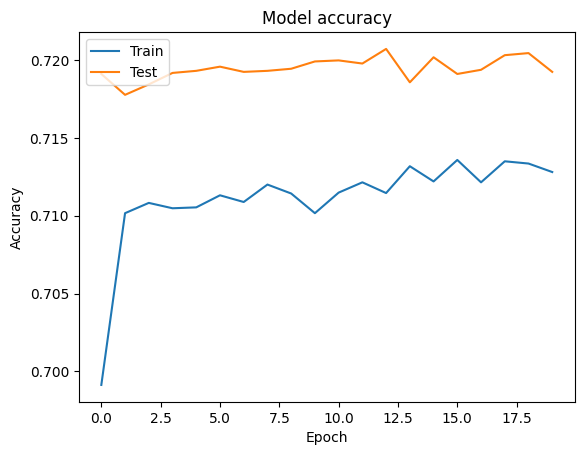

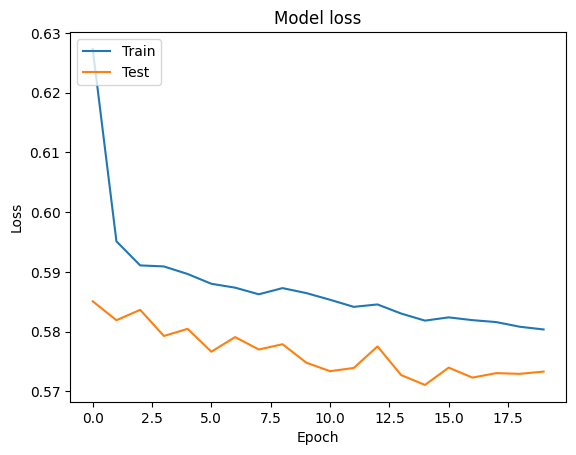

In [123]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


X = df.drop('Churn', axis=1).values
y = df['Churn'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))
y_categorical = to_categorical(y, num_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=42)
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=2, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


The model training results illustrate the following insights:

1. **Model Accuracy and Loss**: Throughout the 20 epochs, the training accuracy steadily improved, reaching around 71.9%, while the test accuracy hovered around 71.8%. The training and validation loss curves indicate a steady decrease, suggesting the model’s training process is consistent and not overfitting significantly.

2. **Confusion Matrix**: The model performed well at predicting non-churned customers (0), with 10,650 correctly classified out of 10,704. However, it struggled with predicting churned customers (1), correctly classifying only 76 out of 4,229. This suggests the model is biased towards the majority class (non-churned customers).

3. **Classification Report**:
   - **Precision** for non-churned customers (0) was high at 0.72, indicating that most customers predicted as non-churned were correct.
   - **Recall** for churned customers (1) was very low (0.02), highlighting the model’s difficulty in capturing true churned customers.
   - **Accuracy** stands at 0.72, but this metric is largely influenced by the model's high performance in identifying non-churned customers.
   - The **macro average F1-score** is low, indicating the model is imbalanced in class performance.



The model trained over 20 epochs, demonstrating fluctuating validation accuracy and loss. The training accuracy improved steadily, reaching around 63%, while the validation accuracy varied between 52% and 61%. The loss steadily decreased, indicating model learning, but performance on validation data showed inconsistency.

The final accuracy was 59%, with the model showing better performance in predicting non-churners (Class 0) with a precision of 77% and recall of 60%. However, for churn prediction (Class 1), the precision was 35% with a higher recall of 54%, indicating a trade-off. The model's overall effectiveness in detecting churn is limited, with potential improvements needed for better class balancing or feature engineering.